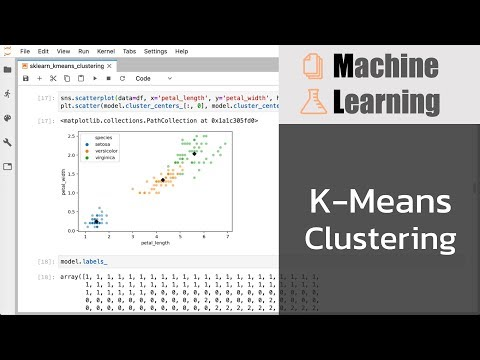

In [28]:
#เรียนรู้ การเขียนpython วิเคราะห์ข้อมูลด้วยอัลกอริทึม  K-Means Clustering (unsupervised learning) 
from IPython.display import IFrame, YouTubeVideo, SVG, HTML
YouTubeVideo('VyjdyymF0NY', 400,300)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBacked.figure_format='retina'

In [4]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/iris.csv')
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica
84,5.4,3.0,4.5,1.5,versicolor
33,5.5,4.2,1.4,0.2,setosa
118,7.7,2.6,6.9,2.3,virginica
38,4.4,3.0,1.3,0.2,setosa
23,5.1,3.3,1.7,0.5,setosa
10,5.4,3.7,1.5,0.2,setosa
21,5.1,3.7,1.5,0.4,setosa
2,4.7,3.2,1.3,0.2,setosa
141,6.9,3.1,5.1,2.3,virginica


In [5]:
df.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

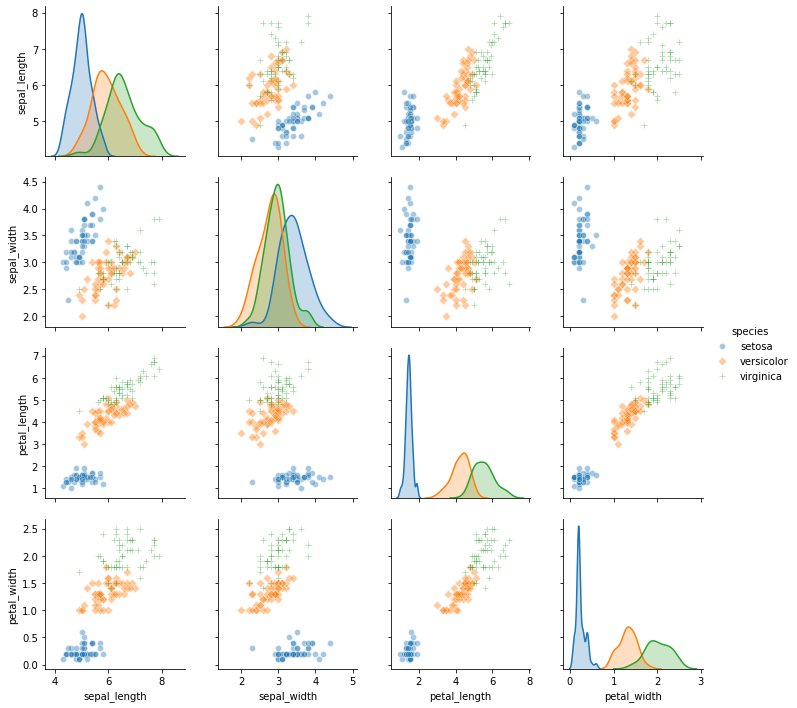

In [8]:
sns.pairplot(df, vars=['sepal_length','sepal_width','petal_length','petal_width'], 
             hue='species', 
             markers=['o','D','+'],
             plot_kws={'alpha': .4});

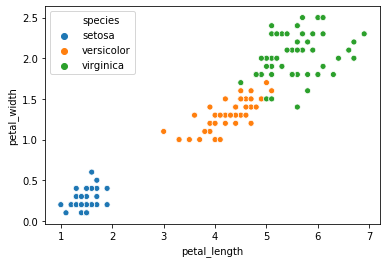

In [9]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

In [13]:
rx=np.random.uniform(1,7,3)
rx

array([3.50421883, 3.91093739, 3.40174656])

In [14]:
ry=np.random.uniform(0,2.5,3)
ry

array([2.46398873, 0.21088694, 1.30340046])

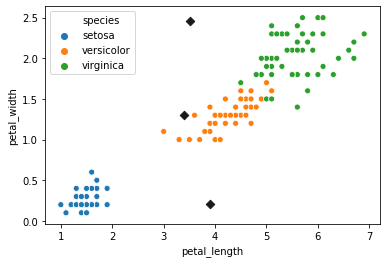

In [16]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.scatter(rx, ry, color='.1', marker='D')

In [17]:
from sklearn.cluster import KMeans

In [18]:
model=KMeans(n_clusters=3)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
X=df[['petal_length','petal_width']]
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
model.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.464     , 0.244     ],
       [4.26923077, 1.34230769]])

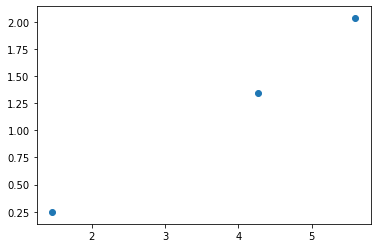

In [23]:
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1])

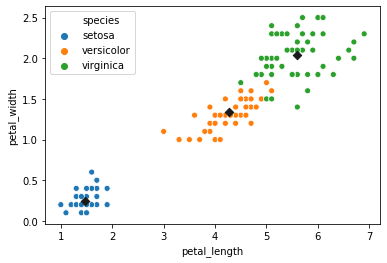

In [24]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='.1', marker='D')

In [27]:
df['cluster']=model.labels_ #เอาผลลัพธ์ที่ได้จากการวิเคราะห์ไปใส่ไว้เป็นคอลัมน์ cluster
pd.crosstab(df['species'], df['cluster']) #คำนวณความถูกต้องด้วย crosstab

cluster,0,1,2
species,,,
setosa,0,50,0
versicolor,2,0,48
virginica,46,0,4


In [1]:
pip install sklean

  ERROR: Could not find a version that satisfies the requirement sklean (from versions: none)
ERROR: No matching distribution found for sklean
Note: you may need to restart the kernel to use updated packages.
